In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# Función de simulación Euler-Maruyama
# ------------------------------
def simulate_path(r, sigma, N0, dt, n):
    N = np.zeros(n)
    N[0] = N0
    for i in range(1, n):
        dW = np.sqrt(dt) * np.random.randn()
        N[i] = N[i-1] + r*N[i-1]*dt + sigma*N[i-1]*dW
        if N[i] < 0:
            N[i] = 0
    return N

In [2]:
# ================================
# Experimento 1: Trayectorias individuales
# ================================
def experiment1(r=0.2, N0=100, T=20, dt=0.001, sigmas=[0.05, 0.2, 0.5], num_traj=20):
    n = int(T/dt)
    t = np.linspace(0, T, n)
    
    plt.rcParams.update({'font.size': 16})  # fuente más grande
    fig, axes = plt.subplots(1, len(sigmas), figsize=(12, 5), sharey=True)
    
    for idx, sigma in enumerate(sigmas):
        ax = axes[idx]
        for _ in range(num_traj):
            N = simulate_path(r, sigma, N0, dt, n)
            ax.plot(t, N, alpha=0.5)
        ax.set_title(f"σ = {sigma}", fontsize=16)
        ax.set_xlabel("Tiempo", fontsize=14)
        if idx == 0:
            ax.set_ylabel("Población", fontsize=14)
        ax.grid(alpha=0.3)
        ax.set_yscale('log')  # escala logarítmica en población
        ax.set_ylim(0.5, 5000)  # rango razonable para log
        
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig('experiment1_log.png', dpi=900, bbox_inches='tight')
    plt.show()


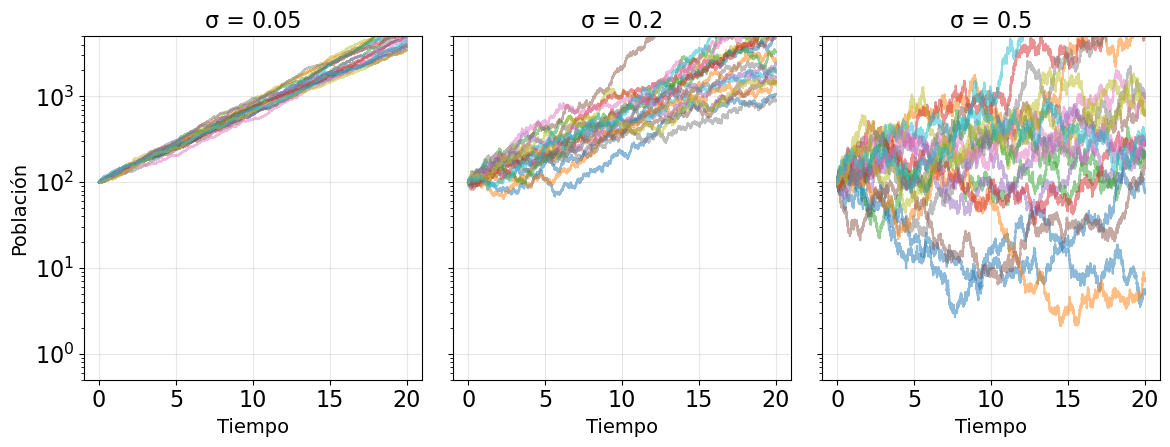

In [5]:
experiment1()

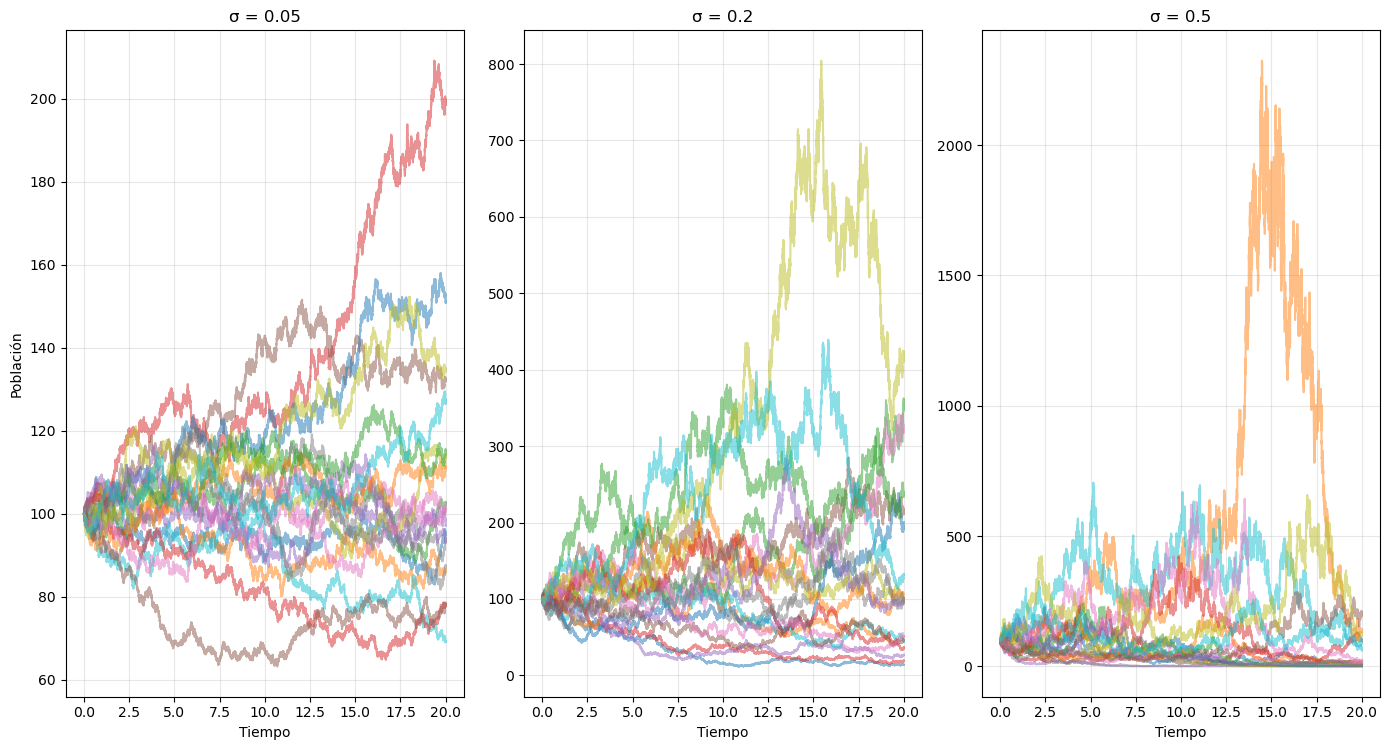

In [8]:
experiment1(r=-0)

In [3]:
# ================================
# Experimento 2: Media y mediana de muchas trayectorias
# ================================
def experiment2(r=0.2, N0=100, T=20, dt=0.001, sigma=0.2, num_runs=2000):
    n = int(T/dt)
    t = np.linspace(0, T, n)
    
    data = np.zeros((num_runs, n))
    for k in range(num_runs):
        data[k] = simulate_path(r, sigma, N0, dt, n)
    
    mean_N = np.mean(data, axis=0)
    median_N = np.median(data, axis=0)
    deterministic = N0 * np.exp(r * t)

    # Configuración tipográfica
    plt.rcParams.update({'font.size': 16})

    plt.figure(figsize=(9, 5))  # figura más pequeña pero legible

    plt.plot(t, deterministic, 'k--', label="Solución determinista", linewidth=3)
    plt.plot(t, mean_N, label="Media", linewidth=3)
    plt.plot(t, median_N, label="Mediana", linewidth=3)
    

    plt.xlabel("Tiempo", fontsize=16)
    plt.ylabel("Población", fontsize=16)

    plt.legend(frameon=True, fontsize=14, edgecolor='black')
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.savefig("experiment2.png", dpi=900, bbox_inches="tight")
    plt.show()

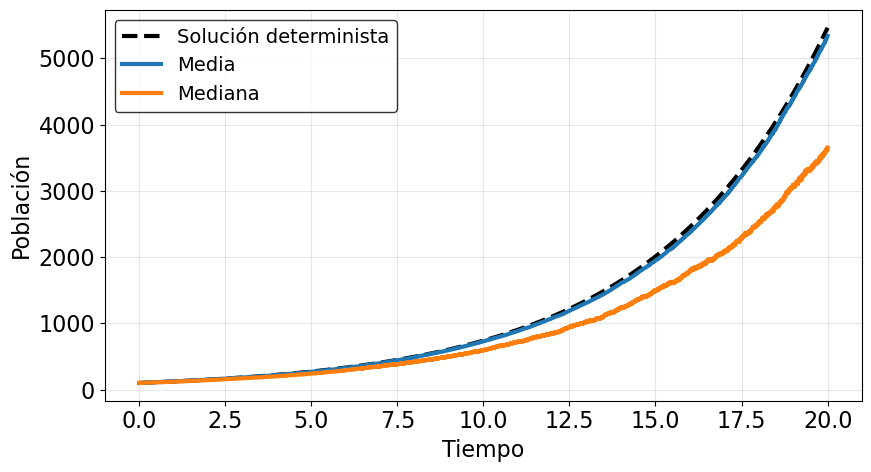

In [4]:
experiment2()

In [4]:
# ================================
# Experimento 2b: Media y mediana en escala log
# ================================
def experiment2_log(r=0.2, N0=100, T=20, dt=0.001, sigma=0.2, num_runs=2000):
    n = int(T/dt)
    t = np.linspace(0, T, n)
    
    # Simulación de todas las trayectorias
    data = np.zeros((num_runs, n))
    for k in range(num_runs):
        data[k] = simulate_path(r, sigma, N0, dt, n)
    
    mean_N = np.mean(data, axis=0)
    median_N = np.median(data, axis=0)
    deterministic = N0 * np.exp(r * t)

    # Configuración tipográfica
    plt.rcParams.update({'font.size': 16})

    plt.figure(figsize=(9, 5))

    plt.plot(t, deterministic, 'k--', label="Solución determinista", linewidth=3)
    plt.plot(t, mean_N, label="Media", linewidth=3)
    plt.plot(t, median_N, label="Mediana", linewidth=3)
    
    plt.xlabel("Tiempo", fontsize=16)
    plt.ylabel("Población", fontsize=16)
    
    plt.yscale("log")  # eje Y en escala logarítmica
    plt.grid(True, which="both", alpha=0.3)  # rejilla para log y linear

    plt.legend(frameon=True, fontsize=14)
    plt.tight_layout()
    plt.savefig("experiment2_log.png", dpi=900, bbox_inches="tight")
    plt.show()


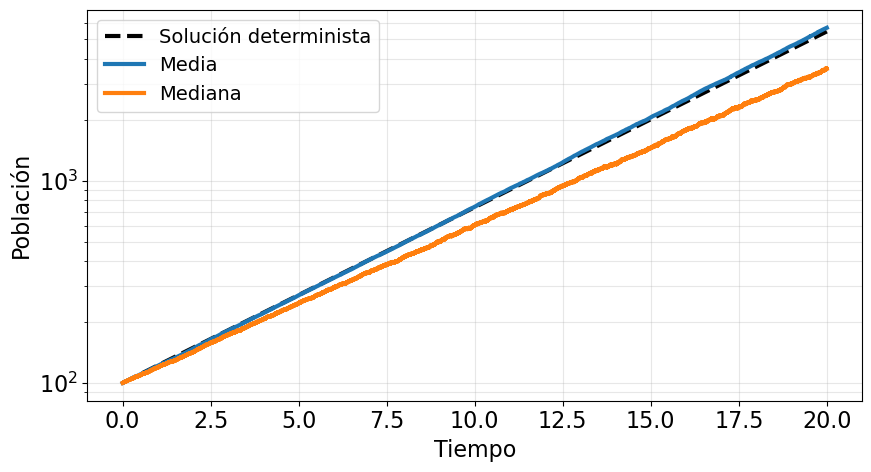

In [5]:
experiment2_log()

In [6]:
# ================================
# Experimento 2c: Media y mediana de ln(N)
# ================================
def experiment2_log_stats(r=0.2, N0=100, T=20, dt=0.001, sigma=0.2, num_runs=2000):
    n = int(T/dt)
    t = np.linspace(0, T, n)
    
    # Simulación de todas las trayectorias
    data = np.zeros((num_runs, n))
    for k in range(num_runs):
        data[k] = simulate_path(r, sigma, N0, dt, n)
    
    # Calculamos logaritmo natural de los datos
    log_data = np.log(data + 1e-12)  # añadir epsilon para evitar log(0)
    
    # Media y mediana en escala log
    mean_log = np.mean(log_data, axis=0)
    median_log = np.median(log_data, axis=0)
    
    # Solución determinista en escala lineal
    deterministic = N0 * np.exp(r * t)
    
    # Configuración tipográfica
    plt.rcParams.update({'font.size': 16})
    plt.figure(figsize=(9, 5))
    
    # Graficar en escala lineal usando exp para volver a N
    plt.plot(t, deterministic, 'k--', label="Solución determinista", linewidth=3)
    plt.plot(t, np.exp(mean_log), label="Media log(N)", linewidth=3)
    plt.plot(t, np.exp(median_log), label="Mediana log(N)", linewidth=3)
    
    plt.xlabel("Tiempo", fontsize=16)
    plt.ylabel("Población", fontsize=16)
    
    plt.yscale("log")  # opcional: mostrar eje Y log
    plt.grid(True, which="both", alpha=0.3)
    
    plt.legend(frameon=True, fontsize=14)
    plt.tight_layout()
    plt.savefig("experiment2_log_stats.png", dpi=900, bbox_inches="tight")
    plt.show()


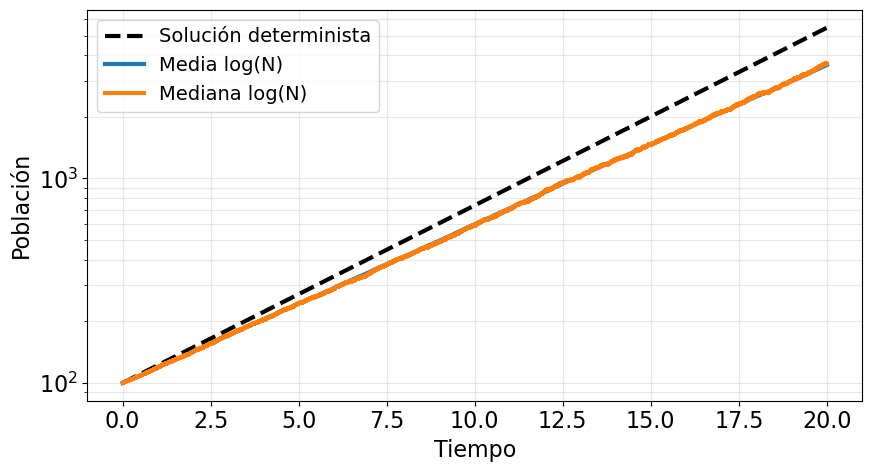

In [9]:
experiment2_log_stats()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# ================================
# Experimento 3: Distribución final N(T)
# ================================
def experiment3(r=0.2, N0=100, T=20, dt=0.001, sigmas=[0.1, 0.3], num_runs=5000):
    n = int(T/dt)
    t = np.linspace(0, T, n)

    plt.rcParams.update({'font.size': 12})

    plt.figure(figsize=(9, 4.5))  # figura compacta, no para contraer luego

    for idx, sigma in enumerate(sigmas):
        final_values = []
        for _ in range(num_runs):
            N = simulate_path(r, sigma, N0, dt, n)
            final_values.append(N[-1])

        ax = plt.subplot(1, len(sigmas), idx + 1)

        ax.hist(
            final_values,
            bins=80,
            density=True,
            alpha=0.75,
            edgecolor='black'
        )

        # --- Notación científica elegante en eje x ---
        formatter = ScalarFormatter(useMathText=True)
        formatter.set_scientific(True)
        formatter.set_powerlimits((0, 0))  # fuerza notación científica
        ax.xaxis.set_major_formatter(formatter) 

        ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

        ax.set_title(fr"$\sigma = {sigma}$", fontsize=12)
        ax.set_xlabel(r"Valor final $N(T)$", fontsize=12)
        ax.set_ylabel("Densidad", fontsize=12)
        ax.grid(alpha=0.3)

    plt.tight_layout()
    plt.savefig("experiment3.png", dpi=900, bbox_inches="tight")
    plt.show()




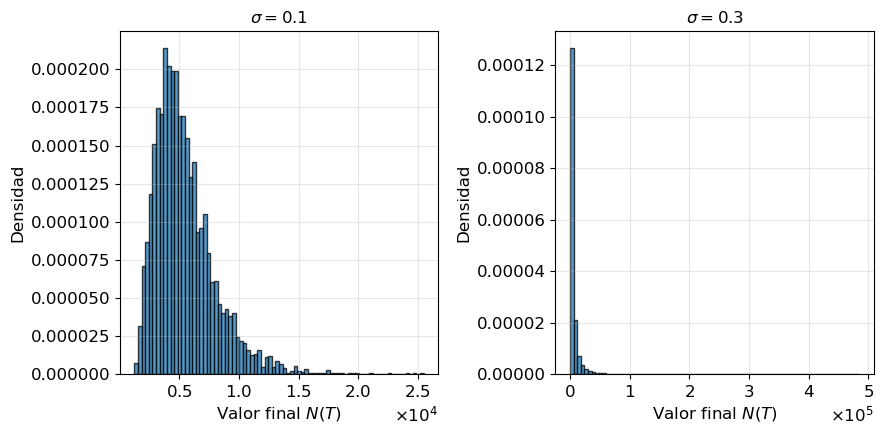

In [22]:
experiment3()